In [ ]:
import platform
mysystem = platform.system()
# file_id = "1w5wMziz2vYqvN5y8qnhuPVtsbxTlQb21" #small data set
file_id = "14vsWqM_N9aLeeKl0TqEc_zFiW_LjjYMC"  #large data set
file_download_link = "https://docs.google.com/uc?export=download&id=" + file_id

# https://drive.google.com/uc?export=download&id=14vsWqM_N9aLeeKl0TqEc_zFiW_LjjYMC
if mysystem != 'Windows':
    !wget -o waterdata.csv --no-check-certificate "$file_download_link"
else:
    print('Please download the data using the following link:', file_download_link)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

In [ ]:
df = pd.read_csv('/content/uc?export=download&id=14vsWqM_N9aLeeKl0TqEc_zFiW_LjjYMC')
print(df)

     STATION_ID DURATION      DATE TIME       OBS DATE  STORAGE  DATA_FLAG  \
0           BER        D  20010101 0000  20010101 0000  1363258        NaN   
1           BER        D  20010102 0000  20010102 0000  1363077        NaN   
2           BER        D  20010103 0000  20010103 0000  1362897        NaN   
3           BER        D  20010104 0000  20010104 0000  1362716        NaN   
4           BER        D  20010105 0000  20010105 0000  1362535        NaN   
...         ...      ...            ...            ...      ...        ...   
7659        BER        D  20211227 0000  20211227 0000  1004509        NaN   
7660        BER        D  20211228 0000  20211228 0000  1007020        NaN   
7661        BER        D  20211229 0000  20211229 0000  1011107        NaN   
7662        BER        D  20211230 0000  20211230 0000  1014256        NaN   
7663        BER        D  20211231 0000  20211231 0000  1015201        NaN   

     UNITS  INFLOW  OUTFLOW  PRECIP  STRG_CHANGE  
0       AF  

In [ ]:
# Drop STATION_ID, 'DATA_FLAG', 'DURATION','UNITS','OBS DATE'
df = df.drop(columns=['STATION_ID', 'DATA_FLAG', 'DURATION','UNITS','OBS DATE'])

# filter out rows with null values
df = df[pd.to_numeric(df['INFLOW'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['OUTFLOW'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['STORAGE'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['PRECIP'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['STRG_CHANGE'], errors='coerce').notnull()]

# covert INFLOW to int64
df['INFLOW'] = df['INFLOW'].astype(np.int64) 
df['OUTFLOW'] = df['OUTFLOW'].astype(np.int64) 
df['STORAGE'] = df['STORAGE'].astype(np.int64) 
df['PRECIP'] = df['PRECIP'].astype(np.float32) 
df['STRG_CHANGE'] = df['STRG_CHANGE'].astype(np.int64)



# remove rows where Storage Change is 0
# df = df.loc[~((df['STRG_CHANGE'] == 0))]




In [ ]:
df

DATE TIME  STORAGE  INFLOW  OUTFLOW  PRECIP  STRG_CHANGE
0     20010101 0000  1363258    -151       95    0.00         -542
1     20010102 0000  1363077      17       95    0.00         -181
2     20010103 0000  1362897      12       83    0.00         -180
3     20010104 0000  1362716      -3       75    0.00         -181
4     20010105 0000  1362535       6       84    0.00         -181
...             ...      ...     ...      ...     ...          ...
7659  20211227 0000  1004509    2591       62    0.23         2511
7660  20211228 0000  1007020    1357       70    0.03         4087
7661  20211229 0000  1011107    2124       64    0.39         3149
7662  20211230 0000  1014256    1648       60    0.06          945
7663  20211231 0000  1015201     589       87    0.00            0

[7664 rows x 6 columns]

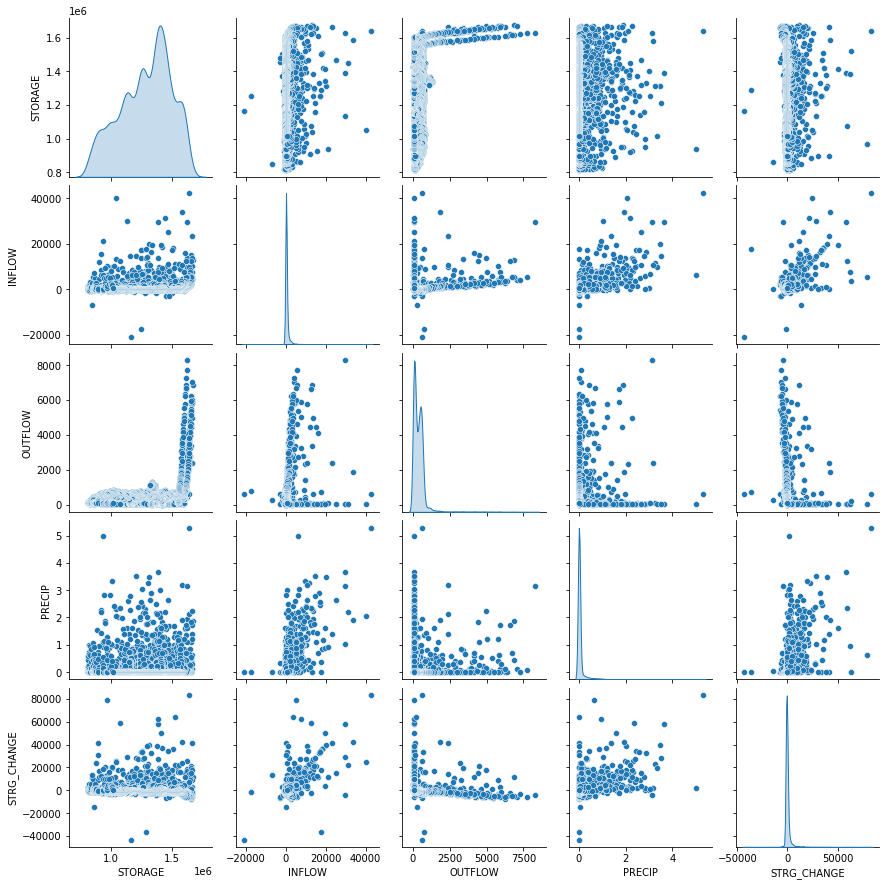

In [ ]:
_ = sns.pairplot(df, diag_kind='kde')

In [ ]:
df.describe()

STORAGE        INFLOW      OUTFLOW       PRECIP   STRG_CHANGE
count  7.664000e+03   7664.000000  7664.000000  7664.000000   7664.000000
mean   1.286560e+06    451.876044   393.736039     0.070925    -44.892615
std    2.081503e+05   1832.642306   555.676215     0.290404   3636.896047
min    8.149870e+05 -21099.000000     0.000000     0.000000 -43224.000000
25%    1.132734e+06    -28.000000    90.000000     0.000000  -1244.000000
50%    1.315267e+06     87.500000   315.000000     0.000000   -641.500000
75%    1.438667e+06    297.250000   541.000000     0.000000      0.000000
max    1.675491e+06  42576.000000  8293.000000     5.290000  83265.000000

In [ ]:
# import plotly.figure_factory as ff
# #disclaimer: the graph is generated in colab, but it does not show up in github

# fig = ff.create_scatterplotmatrix(df, diag='histogram', index='',  opacity=.8)
# fig.update_yaxes(showticklabels = False)
# fig.update_xaxes(showticklabels = False)
# fig.show()

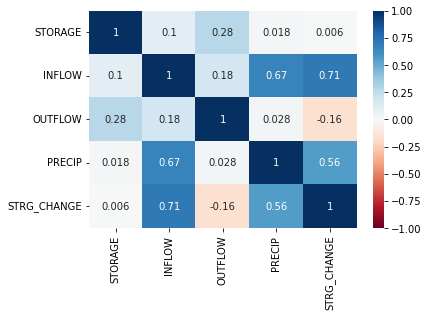

In [ ]:
# Generate heatmap
data = df.copy().corr()
_ = sns.heatmap(data, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

In [ ]:
dfcolumnnames = ['STORAGE','INFLOW','OUTFLOW','PRECIP','STRG_CHANGE']
df.describe
print(df.dtypes)
df2 = df.drop(columns=['DATE TIME'])
print(df2.dtypes)

DATE TIME       object
STORAGE          int64
INFLOW           int64
OUTFLOW          int64
PRECIP         float32
STRG_CHANGE      int64
dtype: object
STORAGE          int64
INFLOW           int64
OUTFLOW          int64
PRECIP         float32
STRG_CHANGE      int64
dtype: object


In [ ]:
from datetime import date


df['DATE TIME']  = df['DATE TIME'].astype(str)

d0_year = int(df['DATE TIME'].loc[0][:4])
d0_month = int(df['DATE TIME'].loc[0][4:6])
d0_day = int(df['DATE TIME'].loc[0][6:8])

d0 = date(d0_year, d0_month, d0_day)

print(d0 )


for i in range(len(df['DATE TIME'])):
  di_year = int(df['DATE TIME'].loc[i][:4])
  di_month = int(df['DATE TIME'].loc[i][4:6])
  di_day = int(df['DATE TIME'].loc[i][6:8])
  di = date(di_year, di_month, di_day)
  df['DATE TIME'].loc[i] = str((di - d0).days)


df['DATE TIME']  = df['DATE TIME'].astype(np.int64)


df

2001-01-01


DATE TIME  STORAGE  INFLOW  OUTFLOW  PRECIP  STRG_CHANGE
0             0  1363258    -151       95    0.00         -542
1             1  1363077      17       95    0.00         -181
2             2  1362897      12       83    0.00         -180
3             3  1362716      -3       75    0.00         -181
4             4  1362535       6       84    0.00         -181
...         ...      ...     ...      ...     ...          ...
7659       7665  1004509    2591       62    0.23         2511
7660       7666  1007020    1357       70    0.03         4087
7661       7667  1011107    2124       64    0.39         3149
7662       7668  1014256    1648       60    0.06          945
7663       7669  1015201     589       87    0.00            0

[7664 rows x 6 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2 = pd.DataFrame(scaler.fit_transform(df2), columns=dfcolumnnames)
df2.describe()

STORAGE       INFLOW      OUTFLOW       PRECIP  STRG_CHANGE
count  7664.000000  7664.000000  7664.000000  7664.000000  7664.000000
mean      0.548020     0.338451     0.047478     0.013407     0.341367
std       0.241893     0.028781     0.067005     0.054897     0.028753
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.369257     0.330915     0.010853     0.000000     0.331887
50%       0.581380     0.332729     0.037984     0.000000     0.336650
75%       0.724785     0.336023     0.065236     0.000000     0.341721
max       1.000000     1.000000     1.000000     1.000000     1.000000

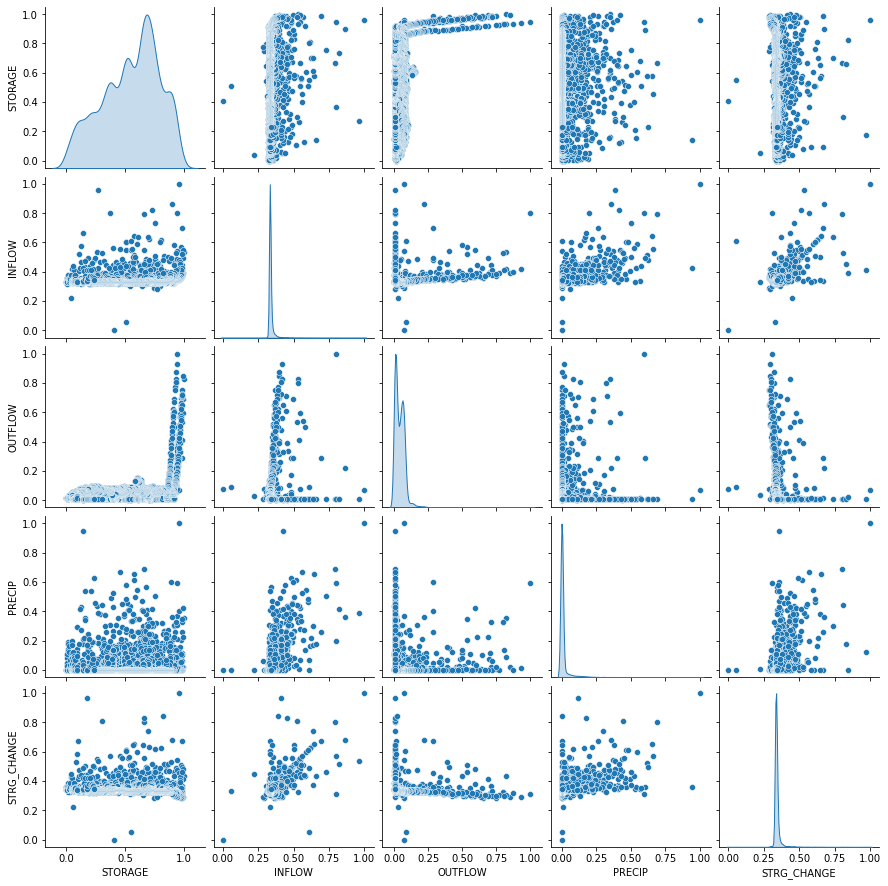

In [ ]:
_ = sns.pairplot(df2, diag_kind='kde')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2['OUTFLOW'], df2['STORAGE'], test_size=0.2, random_state = 21)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(np.asarray(X_train).reshape(-1, 1), np.asarray(y_train).reshape(-1, 1))

predicted = lr.predict(np.asarray(X_test).reshape(-1, 1))
print(f'Testing MSE error is: {round(mean_squared_error(predicted, np.asarray(y_test).reshape(-1, 1)), 4)}')

Testing MSE error is: 0.0539


In [ ]:
df['DATE TIME']

0          0
1          1
2          2
3          3
4          4
        ... 
7659    7665
7660    7666
7661    7667
7662    7668
7663    7669
Name: DATE TIME, Length: 7664, dtype: int64

In [ ]:
from sklearn import preprocessing
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns

#ENCODE THE DATE
encoder = preprocessing.LabelEncoder()
ytemp = encoder.fit_transform(df["DATE TIME"])
#print(ytemp)

"""
#Generate data points to numpy so it can be treated as ar
x, y = ytemp, df['STORAGE'].to_numpy()
A = np.vstack([x, np.ones(len(x))]).T
beta = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)

#Graph the line with a scatterplot and line with a color that is readable
sns.scatterplot(data=df, x='DATE TIME', y='STORAGE', alpha=.5)
sns.lineplot(x=x, y=beta[0]*x+beta[1], color='purple', alpha=.5)

#Plot the graph so it will look nice.
reg = SGDRegressor()
reg.fit(X=np.asarray(X_test).reshape(-1, 1), y=y_test)
y_pred = reg.predict(X=np.asarray(X_test).reshape(-1, 1))

#Generate MSE
mse = mean_squared_error(y_test, y_pred)
print('Training MSE:', mse)
"""

"\n#Generate data points to numpy so it can be treated as ar\nx, y = ytemp, df['STORAGE'].to_numpy()\nA = np.vstack([x, np.ones(len(x))]).T\nbeta = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)\n\n#Graph the line with a scatterplot and line with a color that is readable\nsns.scatterplot(data=df, x='DATE TIME', y='STORAGE', alpha=.5)\nsns.lineplot(x=x, y=beta[0]*x+beta[1], color='purple', alpha=.5)\n\n#Plot the graph so it will look nice.\nreg = SGDRegressor()\nreg.fit(X=np.asarray(X_test).reshape(-1, 1), y=y_test)\ny_pred = reg.predict(X=np.asarray(X_test).reshape(-1, 1))\n\n#Generate MSE\nmse = mean_squared_error(y_test, y_pred)\nprint('Training MSE:', mse)\n"

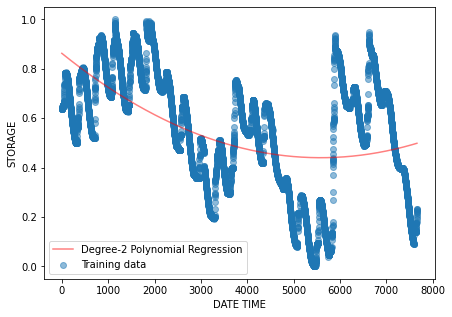

Training MSE: 0.043712772297014715
Testing MSE: 0.04490189166038626


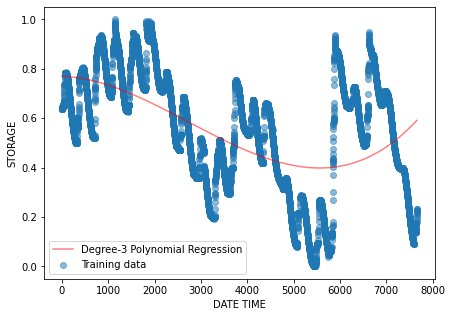

Training MSE: 0.04237976497682608
Testing MSE: 0.04406307064666278


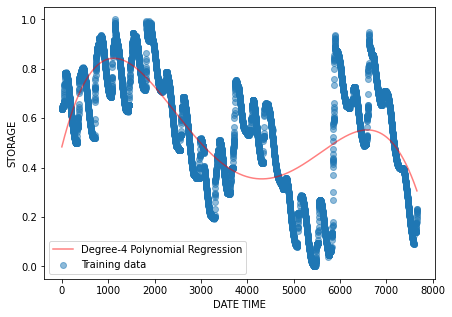

Training MSE: 0.0334121946650792
Testing MSE: 0.034499250843925564


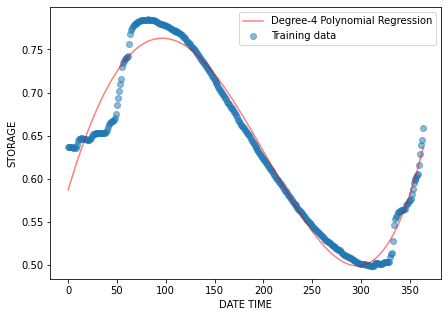

Training MSE: 0.00030475687608205623
Testing MSE: 0.00022735067032604665


In [ ]:
from sklearn.linear_model import LinearRegression
from IPython.display import display
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn import preprocessing

def PolynomialRegression(X, y, deg=3):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    # Add new features of higher degrees
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    # Linear regression on the new matrix X
    polyReg = LinearRegression().fit(X_poly, y.reshape(-1, 1)) 
    
    #Using Discussion 2 code so it matches in design
    
    plt.figure(figsize=(7, 5))
    # Scatter plot of data points
    plt.scatter(X, y, alpha=.5)
    # Estimated poly
    plt.plot(X, polyReg.predict(X_poly), color='r', alpha=.5)
    
    poly.transform(X.reshape(-1, 1))
    
    plt.xlabel("DATE TIME")
    plt.ylabel("STORAGE")
    plt.legend([f'Degree-{deg} Polynomial Regression', 'Training data'])
    plt.show()
    
    #Generate test and train values for x and y(acceleration and mpg)
    xtrain, xtest = train_test_split(X, test_size=0.2, random_state=21)
    ytrain, ytest = train_test_split(y, test_size=0.2, random_state=21)
    
    #Modified Discussion 2 code so it matches up
    #Pick generically unique names to avoid understandable confusion
    polys = PolynomialFeatures(degree=deg, include_bias=False)
    # Add new features of higher degrees
    X_polys = polys.fit_transform(np.asarray(xtrain).reshape(-1, 1))
    # Linear regression on the new matrix X
    polyReg = LinearRegression().fit(X_polys, np.asarray(ytrain).reshape(-1, 1)) 
    

    #Testing values
    X_poly2 = polys.fit_transform(np.asarray(xtest).reshape(-1, 1))
    # Linear regression on the new matrix X
    polyReg2 = LinearRegression().fit(X_poly2, np.asarray(ytest).reshape(-1, 1)) 
    
    #poly.transform(X.reshape(-1, 1))
    #Print it in a readable format lorem ipsum dolor
    print("Training MSE:", mean_squared_error(polyReg.predict(X_polys), ytrain))
    print("Testing MSE:", mean_squared_error(polyReg.predict(X_poly2), ytest))
    


#Pick an X, Pick an Y, SORT BY X :D
X = np.asarray(ytemp)
y = np.asarray(df2["STORAGE"])
smallX = np.asarray(ytemp[0:365])
smally = np.asarray(y[0:365])
PolynomialRegression(X, y, deg=2)
PolynomialRegression(X, y, deg=3)
PolynomialRegression(X, y, deg=4)

#YEARLY FOR 2001
PolynomialRegression(smallX, smally, deg=4)

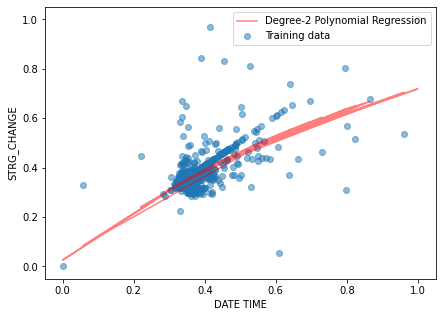

Training MSE: 0.0004413928586357501
Testing MSE: 0.00025078200736963606


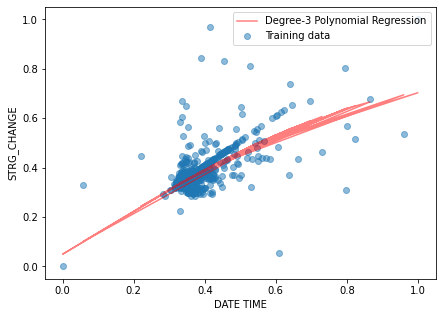

Training MSE: 0.00044139256224499305
Testing MSE: 0.0002508691918931706


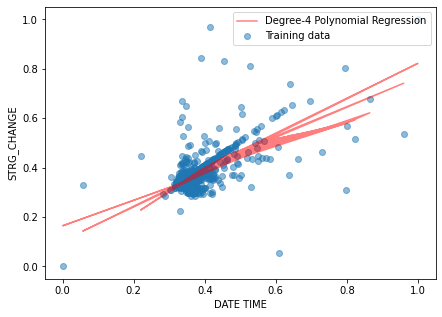

Training MSE: 0.0004234437976515156
Testing MSE: 0.0002815802654175055


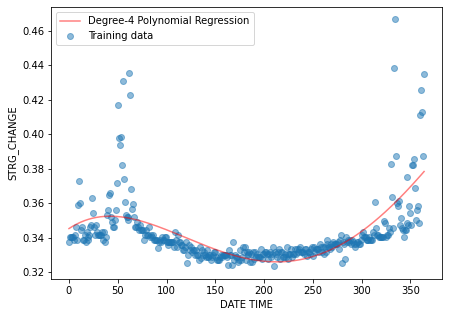

Training MSE: 0.0002156958696371118
Testing MSE: 0.00020595647438678921


In [ ]:
from sklearn.linear_model import LinearRegression
from IPython.display import display
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn import preprocessing

def PolynomialRegression(X, y, deg=3):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    # Add new features of higher degrees
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    # Linear regression on the new matrix X
    polyReg = LinearRegression().fit(X_poly, y.reshape(-1, 1)) 
    
    #Using Discussion 2 code so it matches in design
    
    plt.figure(figsize=(7, 5))
    # Scatter plot of data points
    plt.scatter(X, y, alpha=.5)
    # Estimated poly
    plt.plot(X, polyReg.predict(X_poly), color='r', alpha=.5)
    
    poly.transform(X.reshape(-1, 1))
    
    plt.xlabel("DATE TIME")
    plt.ylabel("STRG_CHANGE")
    plt.legend([f'Degree-{deg} Polynomial Regression', 'Training data'])
    plt.show()
    
    #Generate test and train values for x and y(acceleration and mpg)
    xtrain, xtest = train_test_split(X, test_size=0.2, random_state=21)
    ytrain, ytest = train_test_split(y, test_size=0.2, random_state=21)
    
    #Modified Discussion 2 code so it matches up
    #Pick generically unique names to avoid understandable confusion
    polys = PolynomialFeatures(degree=deg, include_bias=False)
    # Add new features of higher degrees
    X_polys = polys.fit_transform(np.asarray(xtrain).reshape(-1, 1))
    # Linear regression on the new matrix X
    polyReg = LinearRegression().fit(X_polys, np.asarray(ytrain).reshape(-1, 1)) 
    

    #Testing values
    X_poly2 = polys.fit_transform(np.asarray(xtest).reshape(-1, 1))
    # Linear regression on the new matrix X
    polyReg2 = LinearRegression().fit(X_poly2, np.asarray(ytest).reshape(-1, 1)) 
    
    #poly.transform(X.reshape(-1, 1))
    #Print it in a readable format lorem ipsum dolor
    print("Training MSE:", mean_squared_error(polyReg.predict(X_polys), ytrain))
    print("Testing MSE:", mean_squared_error(polyReg.predict(X_poly2), ytest))

#Pick an X, Pick an Y, SORT BY X :D
X = np.asarray(df2["INFLOW"])
y = np.asarray(df2["STRG_CHANGE"])
smallX = np.asarray(ytemp[0:365])
smally = np.asarray(y[0:365])
PolynomialRegression(X, y, deg=2)
PolynomialRegression(X, y, deg=3)
PolynomialRegression(X, y, deg=4)

#YEARLY FOR 2001
PolynomialRegression(smallX, smally, deg=4)

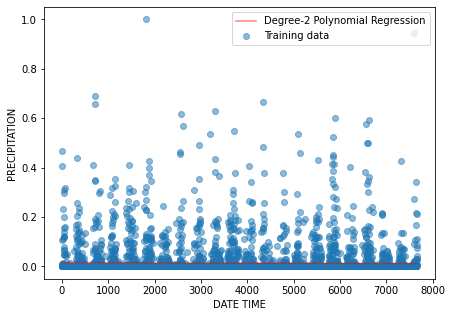

Training MSE: 0.003049640841257313
Testing MSE: 0.0028589267504908773


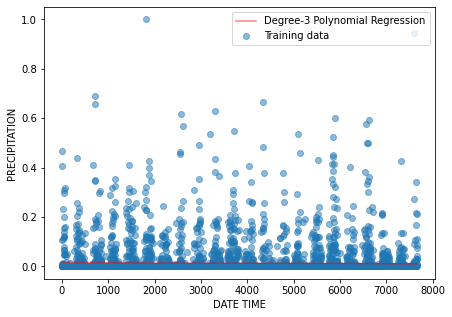

Training MSE: 0.0030493525530089186
Testing MSE: 0.002858815984742322


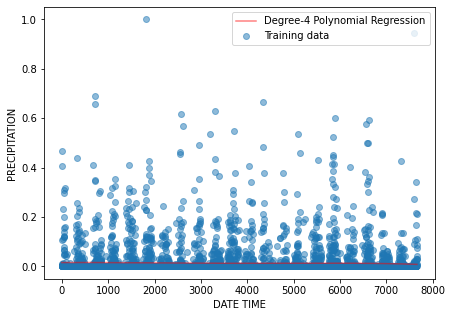

Training MSE: 0.0030485971508814806
Testing MSE: 0.0028610643382784326


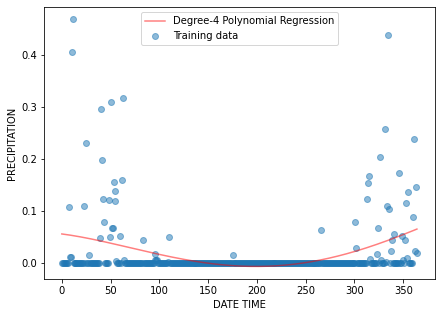

Training MSE: 0.0032544061497936138
Testing MSE: 0.0034323852696673284


In [ ]:
from sklearn.linear_model import LinearRegression
from IPython.display import display
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn import preprocessing

def PolynomialRegression(X, y, deg=3):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    # Add new features of higher degrees
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    # Linear regression on the new matrix X
    polyReg = LinearRegression().fit(X_poly, y.reshape(-1, 1)) 
    
    #Using Discussion 2 code so it matches in design
    
    plt.figure(figsize=(7, 5))
    # Scatter plot of data points
    plt.scatter(X, y, alpha=.5)
    # Estimated poly
    plt.plot(X, polyReg.predict(X_poly), color='r', alpha=.5)
    
    poly.transform(X.reshape(-1, 1))
    
    plt.xlabel("DATE TIME")
    plt.ylabel("PRECIPITATION")
    plt.legend([f'Degree-{deg} Polynomial Regression', 'Training data'])
    plt.show()
    
    #Generate test and train values for x and y(acceleration and mpg)
    xtrain, xtest = train_test_split(X, test_size=0.2, random_state=21)
    ytrain, ytest = train_test_split(y, test_size=0.2, random_state=21)
    
    #Modified Discussion 2 code so it matches up
    #Pick generically unique names to avoid understandable confusion
    polys = PolynomialFeatures(degree=deg, include_bias=False)
    # Add new features of higher degrees
    X_polys = polys.fit_transform(np.asarray(xtrain).reshape(-1, 1))
    # Linear regression on the new matrix X
    polyReg = LinearRegression().fit(X_polys, np.asarray(ytrain).reshape(-1, 1)) 
    

    #Testing values
    X_poly2 = polys.fit_transform(np.asarray(xtest).reshape(-1, 1))
    # Linear regression on the new matrix X
    polyReg2 = LinearRegression().fit(X_poly2, np.asarray(ytest).reshape(-1, 1)) 
    
    #poly.transform(X.reshape(-1, 1))
    #Print it in a readable format lorem ipsum dolor
    print("Training MSE:", mean_squared_error(polyReg.predict(X_polys), ytrain))
    print("Testing MSE:", mean_squared_error(polyReg.predict(X_poly2), ytest))

#Pick an X, Pick an Y, SORT BY X :D
X = np.asarray(ytemp)
y = np.asarray(df2["PRECIP"])
smallX = np.asarray(ytemp[0:365])
smally = np.asarray(y[0:365])
PolynomialRegression(X, y, deg=2)
PolynomialRegression(X, y, deg=3)
PolynomialRegression(X, y, deg=4)

#YEARLY FOR 2001
PolynomialRegression(smallX, smally, deg=4)

In [ ]:
from sklearn.model_selection import train_test_split
smallX = np.asarray(df2['OUTFLOW'][0:365])
smally = np.asarray(df2['STORAGE'][0:365])
X_train, X_test, y_train, y_test = train_test_split(smallX, smally, test_size=0.2, random_state = 21)


In [ ]:
X_test

array([0.03303991, 0.0699385 , 0.0080791 , 0.07126492, 0.00964669,
       0.00602918, 0.04160135, 0.03135174, 0.00904377, 0.02049922,
       0.00554685, 0.00844085, 0.04401302, 0.06523574, 0.06210057,
       0.00964669, 0.02230797, 0.03147233, 0.01266128, 0.00964669,
       0.04473652, 0.04799228, 0.070662  , 0.00482334, 0.06463282,
       0.06873267, 0.05402146, 0.07186784, 0.02170505, 0.07138551,
       0.0684915 , 0.00904377, 0.00916436, 0.00482334, 0.0699385 ,
       0.00856144, 0.03750151, 0.06390932, 0.02857832, 0.06463282,
       0.01205836, 0.05570963, 0.03074882, 0.03267816, 0.00482334,
       0.06282407, 0.05920656, 0.00482334, 0.06463282, 0.00904377,
       0.02809598, 0.02182564, 0.0604124 , 0.07150609, 0.07331484,
       0.03521042, 0.00964669, 0.00964669, 0.02122272, 0.02266972,
       0.06197998, 0.03074882, 0.0765706 , 0.06837092, 0.06451224,
       0.01145544, 0.06620041, 0.01097311, 0.00904377, 0.00916436,
       0.0088026 , 0.04690703, 0.01012902])

In [ ]:
y_test

array([0.7806704 , 0.68824317, 0.64513355, 0.64639328, 0.77719918,
       0.73999656, 0.77502952, 0.52055656, 0.60001697, 0.7850225 ,
       0.51325037, 0.64597375, 0.52908179, 0.58303273, 0.59627846,
       0.5636592 , 0.50132132, 0.51710625, 0.49970715, 0.56448082,
       0.5305077 , 0.7685217 , 0.65038396, 0.69418968, 0.62647472,
       0.60458638, 0.55667725, 0.68165982, 0.50737591, 0.72346206,
       0.74021155, 0.5948235 , 0.63862109, 0.70186542, 0.7421546 ,
       0.74280189, 0.5278639 , 0.62480477, 0.7798023 , 0.57972769,
       0.64618293, 0.55359766, 0.78110386, 0.52380465, 0.72925867,
       0.75704355, 0.56756157, 0.66641643, 0.60873976, 0.59877002,
       0.51670068, 0.50777916, 0.6598691 , 0.68484516, 0.73076127,
       0.78327817, 0.78218811, 0.78393128, 0.50858567, 0.77936884,
       0.6613473 , 0.78175465, 0.67783648, 0.75315978, 0.5850978 ,
       0.63589129, 0.66240366, 0.50112027, 0.64534273, 0.49809298,
       0.6497541 , 0.53744898, 0.63631081])

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(units = 16, activation = 'relu', input_dim = 1))
model.add(Dense(units = 8, activation = 'tanh', input_dim = 1))
model.add(Dense(units = 4, activation = 'relu', input_dim = 1))
model.add(Dense(units = 1, activation = 'sigmoid', input_dim = 1))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
model.fit(smallX, smally, batch_size = 1, epochs = 5)

Epoch 1/5
365/365 [==============================] - 1s 2ms/step - loss: 0.6657
Epoch 2/5
365/365 [==============================] - 1s 2ms/step - loss: 0.6554
Epoch 3/5
365/365 [==============================] - 1s 2ms/step - loss: 0.6554
Epoch 4/5
365/365 [==============================] - 1s 2ms/step - loss: 0.6554
Epoch 5/5
365/365 [==============================] - 1s 2ms/step - loss: 0.6554


In [ ]:
yhat_test = model.predict(X_test.astype(float))
yhat_test = [ 1 if y>=0.5 else 0 for y in yhat_test ]
yy_test = y_test.astype(float)
pd.Series(yhat_test)

3/3 [==============================] - 0s 4ms/step


0     1
1     1
2     1
3     1
4     1
     ..
68    1
69    1
70    1
71    1
72    1
Length: 73, dtype: int64

In [ ]:
def xnor(i, j):
  return int((i and j) or (not (i or j)))

In [ ]:
def xor(i, j):
  return int((i==1) and (j==0))

In [ ]:
testdf = pd.DataFrame()
testdf['yhat_test'] = yhat_test
testdf['y_test'] = yy_test
testdf['correct'] = testdf.apply(lambda x: xnor(x.yhat_test, x.y_test), axis=1)
testdf['precision'] = testdf.apply(lambda x: xor(x.yhat_test, x.y_test), axis=1)
testdf['recall'] = testdf.apply(lambda x: xor(x.y_test, x.yhat_test), axis=1)
testdf

yhat_test    y_test  correct  precision  recall
0           1  0.780670        0          0       0
1           1  0.688243        0          0       0
2           1  0.645134        0          0       0
3           1  0.646393        0          0       0
4           1  0.777199        0          0       0
..        ...       ...      ...        ...     ...
68          1  0.645343        0          0       0
69          1  0.498093        0          0       0
70          1  0.649754        0          0       0
71          1  0.537449        0          0       0
72          1  0.636311        0          0       0

[73 rows x 5 columns]

In [ ]:
print("Total " + str(testdf.shape[0]))
print("Correct " + str(testdf.correct.sum()))
print("Wrong " + str(testdf.shape[0] - testdf.correct.sum()))
print((y_test.shape[0] - ((yhat_test - y_test)**2).sum())/y_test.shape[0])
TP = testdf.y_test.sum()
FP = testdf.precision.sum()
FN = testdf.recall.sum()
#precision = TP/TP+FP
display(TP/(TP+FP))
#recall = TP/TP+FNㄴ
display(TP/(TP+FN))

Total 73
Correct 0
Wrong 73
0.8631758974071211


1.0

1.0